In [1]:
import os
FOLDER_NAME = "LCAProgramsH1BH1B1E3"
# YEAR_MONTH = datetime.today().strftime("%Y-%m")
YEAR_MONTH = "2019-10"
# Assuming all data is inside us-visa-data folder
DOWNLOAD_DIR = os.getenv('DOWNLOAD_DIR', '../../us-visa-data')
PARQUET_DIR = DOWNLOAD_DIR + "/" + FOLDER_NAME + "/" + YEAR_MONTH + "/downloads/parquet"
PARQUET_MASTER_SCHEMA = PARQUET_DIR + "/master_schema"

In [2]:
import pandas as pd
df = pd.read_parquet(os.path.join(PARQUET_MASTER_SCHEMA,"2001-2019_normalized_salary_postal_to_state.snappy.parquet"))

In [3]:
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Top H1b employer by number of h1bs

In [5]:
df_certified_less_3k = df[(df['CASE_STATUS']=='CERTIFIED')&(df['NORMALIZED_SALARY'] < 300000)]
df_certified_less_3k_group_year_employer = df_certified_less_3k.groupby(['YEAR_CASE_BELONGS_TO','EMPLOYER_NAME']).agg(COUNT_H1=('CASE_NUMBER','count')).reset_index()
df_certified_less_3k_group_year_employer_3_largest = df_certified_less_3k_group_year_employer.groupby('YEAR_CASE_BELONGS_TO').apply(lambda grp: grp.nlargest(3,['COUNT_H1']))
df_certified_less_3k_group_year_employer_3_largest.droplevel('YEAR_CASE_BELONGS_TO').sort_values(by=['YEAR_CASE_BELONGS_TO','COUNT_H1'],ascending=False)

,YEAR_CASE_BELONGS_TO,EMPLOYER_NAME,COUNT_H1
1468695,2019,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,19379
1482574,2019,INFOSYS LIMITED,18207
1506531,2019,TATA CONSULTANCY SERVICES LIMITED,8515
1406584,2018,DELOITTE CONSULTING LLP,15724
1447588,2018,TATA CONSULTANCY SERVICES LIMITED,14493
1419458,2018,INFOSYS LIMITED,11578
1351786,2017,INFOSYS LIMITED,20565
1380322,2017,TATA CONSULTANCY SERVICES LIMITED,13429
1332895,2017,CAPGEMINI AMERICA INC,8870
1283383,2016,INFOSYS LIMITED,25322


In [6]:
del df_certified_less_3k, df_certified_less_3k_group_year_employer, df_certified_less_3k_group_year_employer_3_largest

# Top n employers by count of H1b in 2019

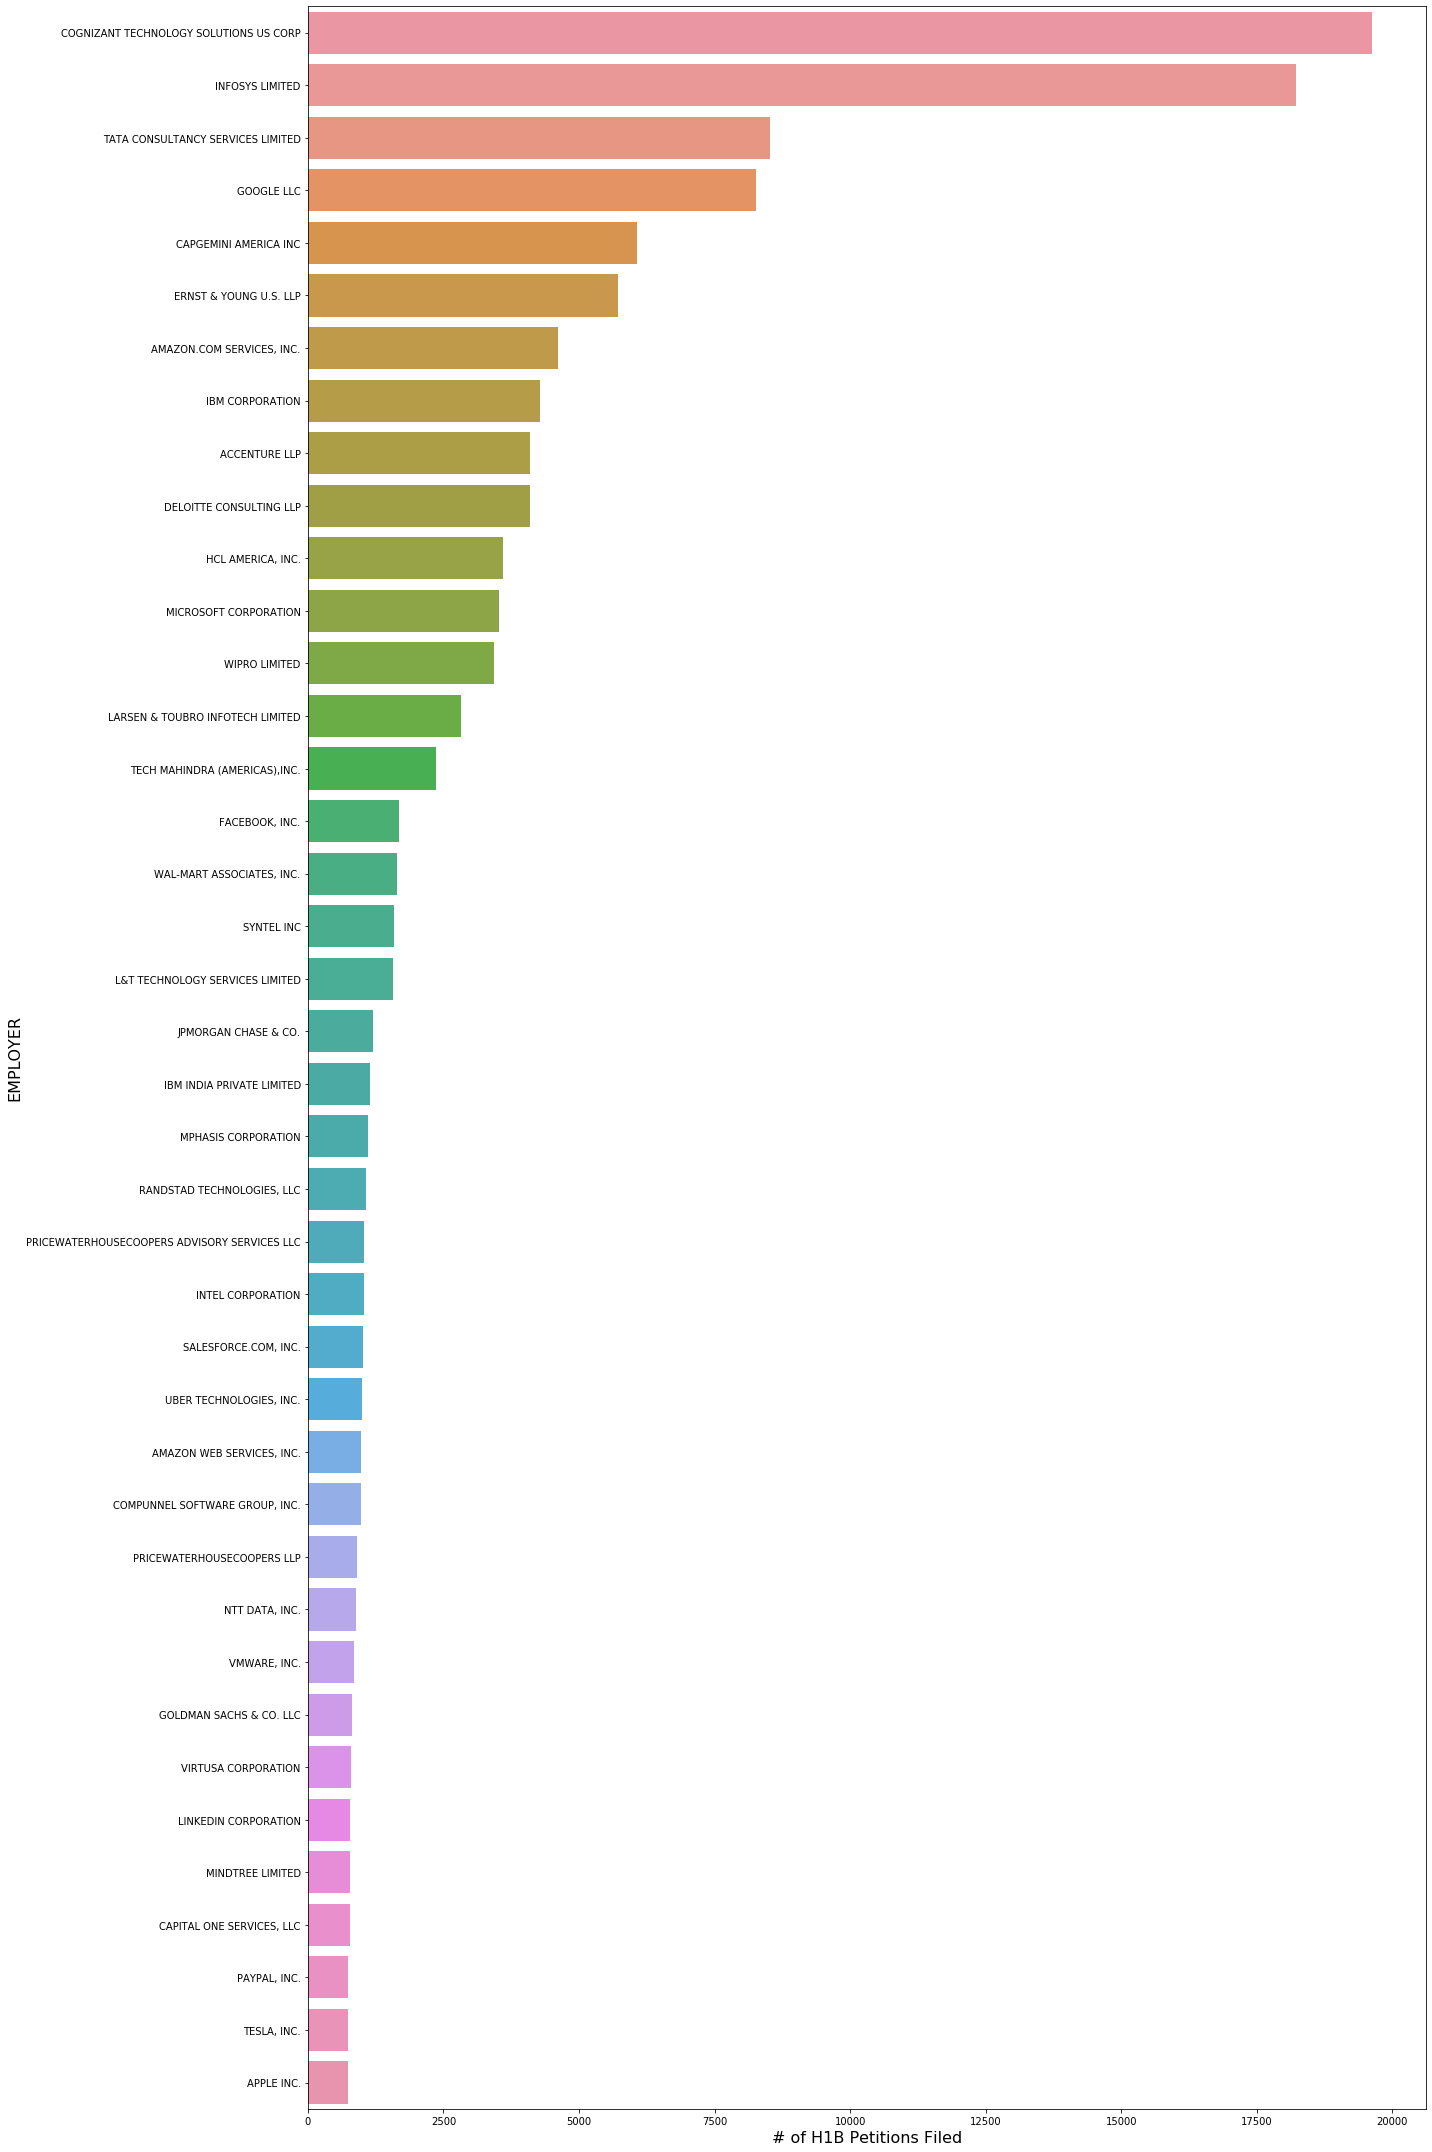

In [7]:
df_employer = pd.DataFrame()
df_2019 = df[df['YEAR_CASE_BELONGS_TO']==2019]
df_employer['EMPLOYER_NAME'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['EMPLOYER_NAME']
df_employer['COUNT'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['NORMALIZED_SALARY']
df_employer['NORMALIZED_SALARY'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).median().reset_index()['NORMALIZED_SALARY']
df_employer_sorted = df_employer.sort_values(by='NORMALIZED_SALARY', ascending=False)

df_employer_sorted = df_employer.sort_values(by='COUNT', ascending=False)
df_employer_sorted_nlargest= df_employer_sorted.nlargest(40,['COUNT'])

fig, ax = plt.subplots(figsize=(20,30))
ax = sns.barplot(x=df_employer_sorted_nlargest['COUNT'], 
                 y=df_employer_sorted_nlargest['EMPLOYER_NAME'])
ax.set_xlabel("# of H1B Petitions Filed",fontsize=16)
ax.set_ylabel("EMPLOYER",fontsize=16)
plt.tight_layout()
plt.savefig(fname='EMPLOYER_NO_H1', dpi=150)
del df_2019, df_employer, df_employer_sorted, df_employer_sorted_nlargest

# Top n employers by H1b median Salary in 2019

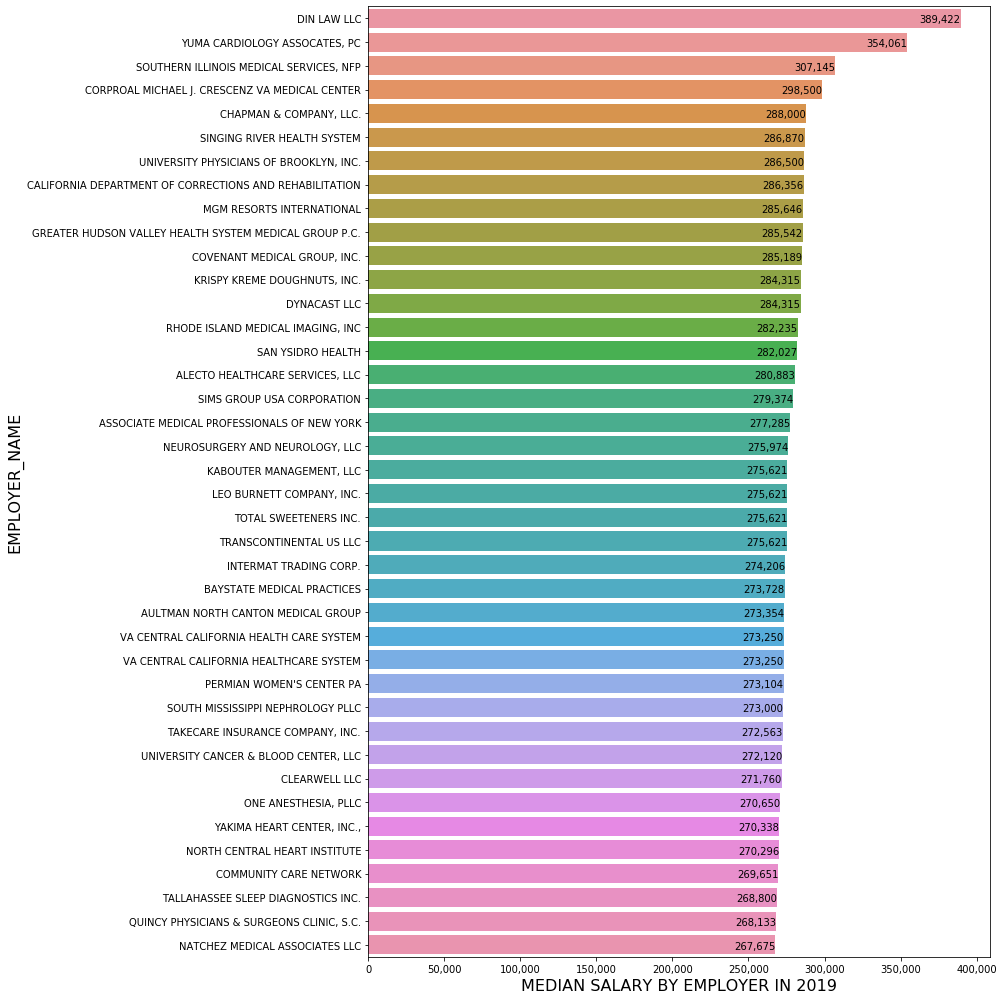

In [4]:
df_employer = pd.DataFrame()
df_2019 = df[df['YEAR_CASE_BELONGS_TO']==2019]

df_employer['EMPLOYER_NAME'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['EMPLOYER_NAME']
df_employer['COUNT'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['NORMALIZED_SALARY']
df_employer['NORMALIZED_SALARY'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).median().reset_index()['NORMALIZED_SALARY']
df_employer_sorted = df_employer.sort_values(by='NORMALIZED_SALARY', ascending=False)
df_employer_sorted_nlargest= df_employer_sorted.nlargest(40,['NORMALIZED_SALARY'])

fig, ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x=df_employer_sorted_nlargest['NORMALIZED_SALARY'], 
                 y=df_employer_sorted_nlargest['EMPLOYER_NAME'])
ax.set_xlabel("MEDIAN SALARY BY EMPLOYER IN 2019",fontsize=16)
ax.set_ylabel("EMPLOYER_NAME",fontsize=16)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1,.0f}'.format(width),
             ha='right', va='center')

plt.tight_layout()
plt.savefig(fname='COMPANY_MEDIAN_SALARY', dpi=150)
del df_employer, df_2019, df_employer_sorted, df_employer_sorted_nlargest

# Top n employers by H1b max Salary in 2019

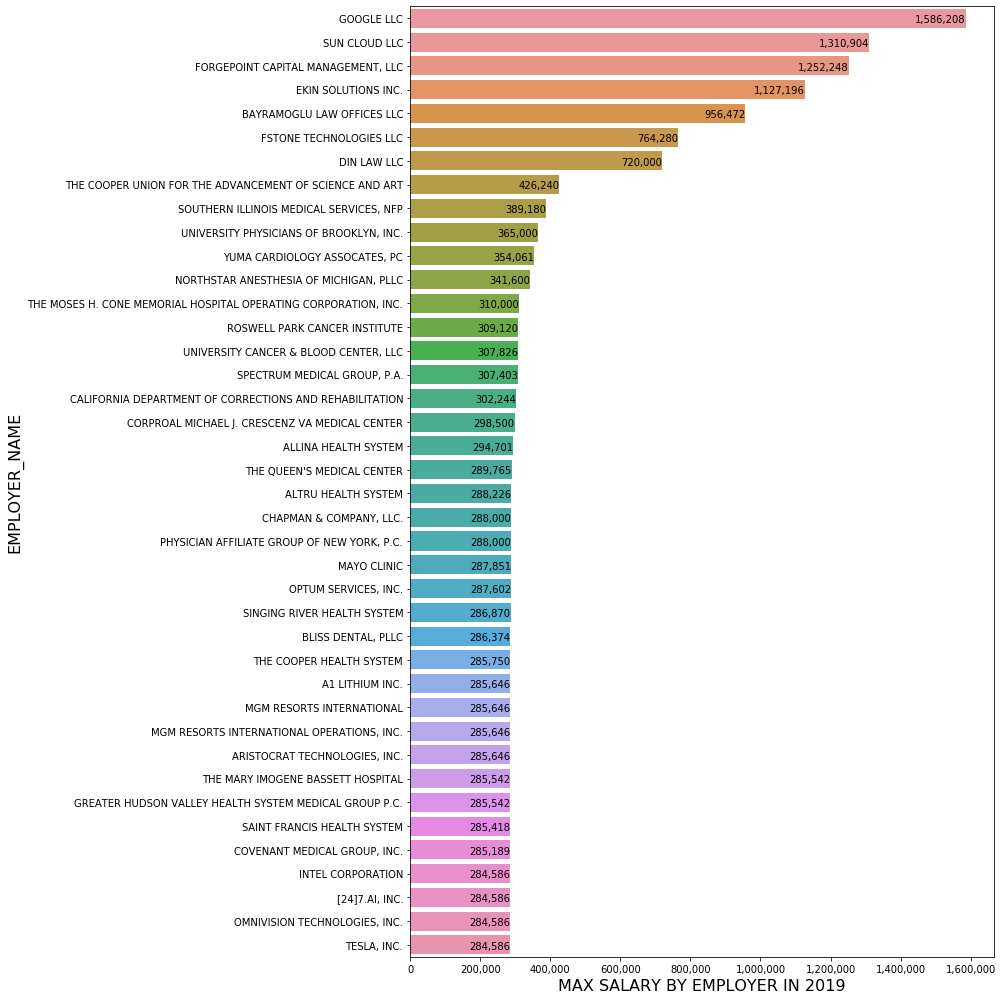

In [4]:
df_employer = pd.DataFrame()
df_2019 = df[df['YEAR_CASE_BELONGS_TO']==2019]

df_employer['EMPLOYER_NAME'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['EMPLOYER_NAME']
df_employer['COUNT'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).count().reset_index()['NORMALIZED_SALARY']
df_employer['NORMALIZED_SALARY'] = df_2019[['EMPLOYER_NAME','NORMALIZED_SALARY']].groupby(by=['EMPLOYER_NAME']).max().reset_index()['NORMALIZED_SALARY']
df_employer_sorted = df_employer.sort_values(by='NORMALIZED_SALARY', ascending=False)
df_employer_sorted_nlargest= df_employer_sorted.nlargest(40,['NORMALIZED_SALARY'])

fig, ax = plt.subplots(figsize=(14,14))
ax = sns.barplot(x=df_employer_sorted_nlargest['NORMALIZED_SALARY'], 
                 y=df_employer_sorted_nlargest['EMPLOYER_NAME'])
ax.set_xlabel("MAX SALARY BY EMPLOYER IN 2019",fontsize=16)
ax.set_ylabel("EMPLOYER_NAME",fontsize=16)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1,.0f}'.format(width),
             ha='right', va='center')

plt.tight_layout()
plt.savefig(fname='COMPANY_MAX_SALARY', dpi=150)
del df_employer, df_2019, df_employer_sorted, df_employer_sorted_nlargest